<h3>Train vs model của thư viện skLearn</h3>

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import numpy as np

In [2]:
import pickle
#  Đọc file train#
with open('x_trainLib.pkl', 'rb') as f:
      x_trainLib = pickle.load(f)
with open('y_trainLib.pkl', 'rb') as f:
      y_trainLib = pickle.load(f)

# Đọc file test #
with open('x_testLib.pkl', 'rb') as f:
      x_testLib = pickle.load(f)
with open('y_testLib.pkl', 'rb') as f:
      y_testLib = pickle.load(f)

In [3]:
sentiment_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1,1),
                                                    
                                                    max_df = 0.8,
                                            max_features=None)), 
                     ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())
                    ])
sentiment_clf = sentiment_clf.fit(x_trainLib, y_trainLib)

In [4]:
y_pred = sentiment_clf.predict(x_testLib)
print('Naive Bayes, Accuracy =', np.mean(y_pred == y_testLib))

Naive Bayes, Accuracy = 0.6505480335267569


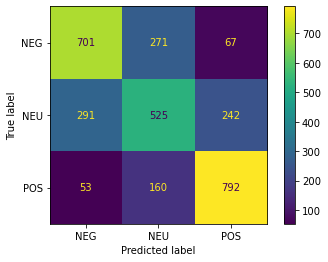

In [5]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
matrix = plot_confusion_matrix(sentiment_clf, x_testLib, y_testLib)